In [43]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [37]:
entire_data = pd.read_csv('./data/USA_cars_datasets.csv')
data = entire_data.loc[:,['price','year','mileage']]
data.head()


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [38]:
data.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [39]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

data['mileage'] = maxmin(data['mileage'])
data['year'] = maxmin(data['year'])
data

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537
...,...,...,...
2494,7800,0.978723,0.023193
2495,9200,0.957447,0.033944
2496,9200,0.957447,0.031037
2497,9200,0.957447,0.031983


In [40]:
y = data['price']
x = data.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state = 100)



63019593071.77777


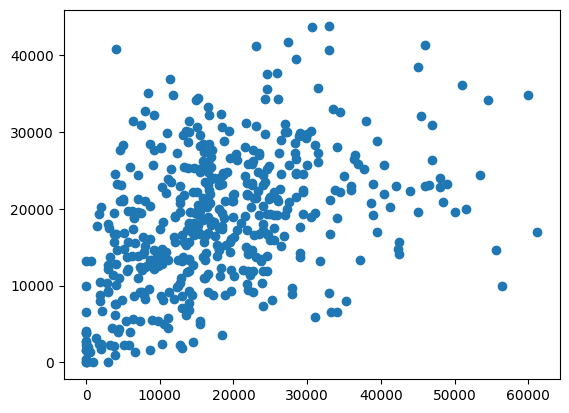

In [55]:
k = 3
model = KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
fitted_model = model.fit(x_train,y_train)
y_hat = fitted_model.predict(x_test)
SSE_3 = np.sum( (y_test-y_hat)**2 )
plt.scatter(y_test,y_hat)
print(SSE_3)





51583519544.11839


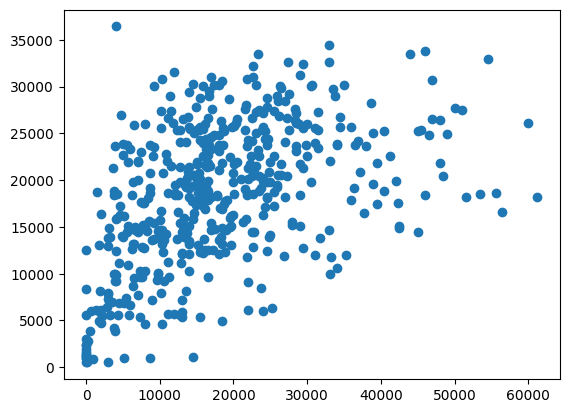

In [54]:
k = 10
model = KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
fitted_model = model.fit(x_train,y_train)
y_hat = fitted_model.predict(x_test)
SSE_10 = np.sum( (y_test-y_hat)**2 )
plt.scatter(y_test,y_hat)
print(SSE_3)



51583519544.11839


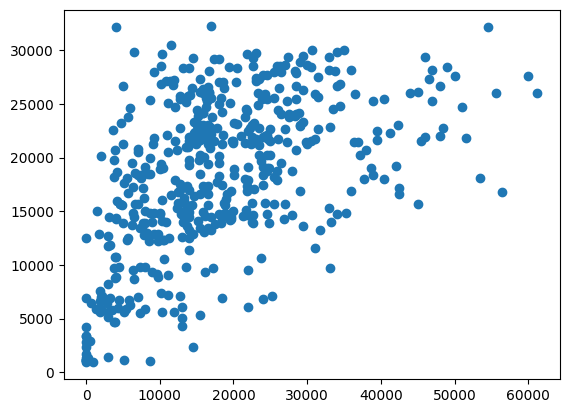

In [53]:
k = 25
model = KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
fitted_model = model.fit(x_train,y_train)
y_hat = fitted_model.predict(x_test)
SSE_3 = np.sum( (y_test-y_hat)**2 )
plt.scatter(y_test,y_hat)
print(SSE_3)



49878817581.778


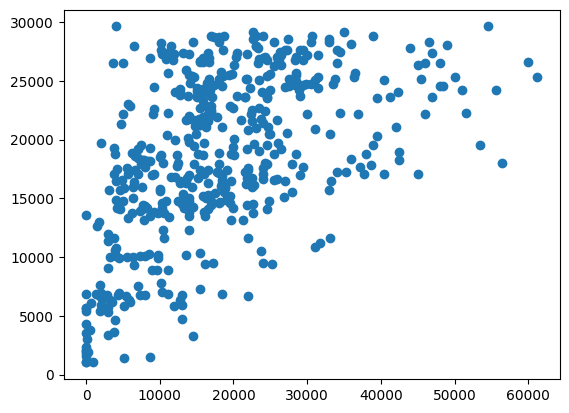

In [50]:
k = 50
model = KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
fitted_model = model.fit(x_train,y_train)
y_hat = fitted_model.predict(x_test)
SSE_3 = np.sum( (y_test-y_hat)**2 )
plt.scatter(y_test,y_hat)
print(SSE_3)



49138071280.060295


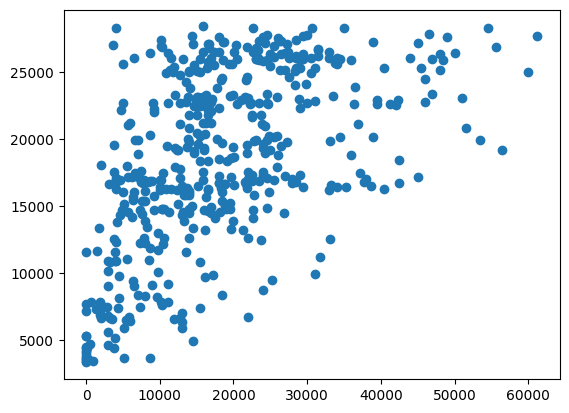

In [51]:
k = 100
model = KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
fitted_model = model.fit(x_train,y_train)
y_hat = fitted_model.predict(x_test)
SSE_3 = np.sum( (y_test-y_hat)**2 )
plt.scatter(y_test,y_hat)
print(SSE_3)



50238649457.106


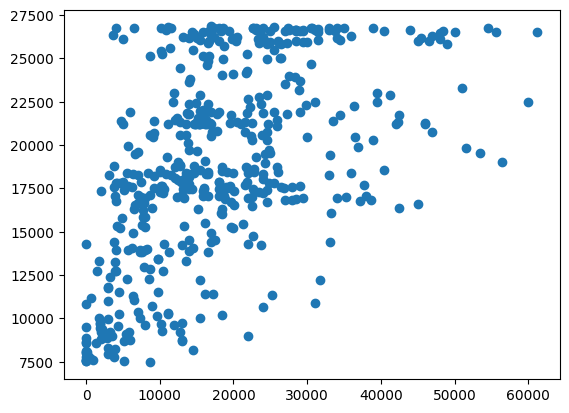

In [52]:
k = 300
model = KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
fitted_model = model.fit(x_train,y_train)
y_hat = fitted_model.predict(x_test)
SSE_3 = np.sum( (y_test-y_hat)**2 )
plt.scatter(y_test,y_hat)
print(SSE_3)


In [56]:
k_bar = 200 # Number of k's to try
SSE = np.zeros(k_bar) # We'll store the SSE here 
SSE_on_train = np.zeros(k_bar) # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(x_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(x_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set
    y_hat = fitted_model.predict(x_train) # Predict values for training set
    SSE_on_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[77]


It seems that the most optimal k-value is 77. It seems k values that were over 100 experienced horizontal bunching, which essentially means that predicitons are all becoming around a single value due to multiple input samples are being assigned the same predicted value. K values around 3, 10, and 25 are experiencing underfitting, as it is hard to take in a pattern from the displayed scatterplots.